# Klasifikasi Tingkat Kelulusan Mahasiswa Menggunakan Algoritma Random Forest
Proyek ini bertujuan untuk memprediksi apakah seorang mahasiswa akan lulus tepat waktu atau tidak tepat waktu berdasarkan data akademik dan demografis. Model klasifikasi diterapkan untuk membantu perguruan tinggi dalam mengidentifikasi mahasiswa yang berpotensi terlambat lulus.

## 1. Import Library
Pada tahap ini, dilakukan import library yang dibutuhkan dalam proyek klasifikasi, seperti pandas dan numpy untuk analisis data, seaborn dan matplotlib untuk visualisasi, scikit-learn untuk model klasifikasi dan evaluasi, serta imblearn untuk menangani ketidakseimbangan data.

In [ ]:
!pip install optuna

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Pra-pemrosesan data
from sklearn.preprocessing import LabelEncoder

# Menangani data tidak seimbang
from imblearn.over_sampling import SMOTE

# Fine Tuning
import optuna


## Load Dataset
Pada tahap ini, dua dataset diunduh langsung dari repository GitHub dalam format .csv, yaitu:

[`ms_lulusan_fix.csv`](https://github.com/trisya07/student-graduation-classification/blob/main/ms_lulusan_fix.csv): Berisi data mahasiswa lulusan, seperti NIM, prodi, status kelulusan, tahun masuk, tahun lulus, dan atribut demografis lainnya.

[`transkip_nilai_fix.csv`](https://github.com/trisya07/student-graduation-classification/blob/main/transkip_nilai_fix.csv): Berisi data transkrip nilai mahasiswa, termasuk kode mata kuliah, nama mata kuliah, nilai, SKS, dan semester.

Kedua dataset ini akan digunakan untuk menggabungkan data akademik dengan data kelulusan dalam analisis klasifikasi kelulusan mahasiswa.

In [2]:
# memuat dataset demografi mahasiswa
url1 = 'https://raw.githubusercontent.com/trisya07/student-graduation-classification/main/ms_lulusan_fix.csv'
df_lulusan = pd.read_csv(url1)

# memuat dataset akademik mahasiswa
url2 = 'https://raw.githubusercontent.com/trisya07/student-graduation-classification/main/transkip_nilai_fix.csv'
df_transkip = pd.read_csv(url2)

In [ ]:
# Menampilkan lima data pertama dari df_transkip
df_transkip

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
0,1,15416255201060,F02160009,Entrepreneurship,Entrepreneurship,Entrepreneurship,3.50,84.25,5,2,B+
1,2,15416255201060,F02160010,Kerja Praktik,Kerja Praktik,Internship,3.75,88.25,6,3,A-
2,3,15416255201060,IF1160020,Desain & Analisis Algoritma,Desain & Analisis Algoritma,Analysis Algorithm & Design,3.50,81.70,3,3,B+
3,4,15416255201060,IF1160021,Analisis & Desain System Berorientasi Obyek,Analisis & Desain System Berorientasi Obyek,Object Oriented Design System,3.75,86.80,3,3,A-
4,5,15416255201060,IF1160022,Pemrograman Berorientasi Objek (*),Pemrograman Berorientasi Objek,Object Oriented Programming,3.75,85.50,3,3,A-
...,...,...,...,...,...,...,...,...,...,...,...
256294,259312,16416286206133,UBP160004,BAHASA INDONESIA,Bahasa Indonesia,Indonesian,3.75,86.20,2,2,A-
256295,259313,16416286206133,UBP160005,JATIDIRI BANGSA,Jatidiri Bangsa,National Identity,3.75,85.25,3,2,A-
256296,259314,16416286206133,UBP160006,KKN,KKN,Community Service,3.75,84.55,7,3,A-
256297,259315,16416286206133,UBP160007,GENERAL ENGLISH,General English,General English,2.76,70.35,1,2,B-


In [ ]:
df_lulusan

,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
...,...,...,...,...,...,...,...,...,...
4537,20416261201301,61201,Pujian,2022-10-10,2020-09-09,0,0,1997,0
4538,20416262201064,62201,Pujian,2023-08-31,2020-09-09,0,0,1994,0
4539,20416273201158,73201,Sangat Memuaskan,2024-07-11,2020-09-09,0,1,0,0
4540,20416274201164,74201,Pujian,2022-08-22,2020-09-09,0,0,1997,0


## Statistik Deskriptif Dataset
Tahap ini digunakan untuk melihat ringkasan statistik dari seluruh kolom dalam dataset dan melihat tipe data pada info(). Tujuannya adalah untuk memahami distribusi awal data, mendeteksi potensi nilai kosong, data duplikat, atau data tidak konsisten sebelum dilakukan pembersihan.

In [ ]:
print("Data Transkip")
df_transkip.info()

Data Transkip
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256299 entries, 0 to 256298
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            256299 non-null  int64  
 1   nim           256299 non-null  int64  
 2   kode_mk       256299 non-null  object 
 3   nama_mk       256293 non-null  object 
 4   nama_mk_indo  256298 non-null  object 
 5   nama_mk_ing   256293 non-null  object 
 6   nilai_grade   256299 non-null  float64
 7   nilai_total   256299 non-null  float64
 8   semester      256299 non-null  int64  
 9   sks_mk        256299 non-null  int64  
 10  grade         256299 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 21.5+ MB


In [ ]:
print("Data Lulusan")
df_lulusan.info()

Data Lulusan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nim             4542 non-null   int64 
 1   prodi           4542 non-null   int64 
 2   predikat        4542 non-null   object
 3   tanggal_lulus   4542 non-null   object
 4   tgl_masuk       4542 non-null   object
 5   status_masuk    4542 non-null   int64 
 6   jenis_kelamin   4542 non-null   int64 
 7   tahun_lahir     4542 non-null   int64 
 8   status_pegawai  4542 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 319.5+ KB


In [ ]:
print ("-----------------DATA TRANSKIP------------------------")
df_transkip.describe(include='all')

-----------------DATA TRANSKIP------------------------


,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
count,256299.000000,2.562990e+05,256299,256293,256298,256293,256299.000000,256299.000000,256299.000000,256299.000000,256299
unique,NaN,NaN,1028,1292,665,694,NaN,NaN,NaN,NaN,8
top,NaN,NaN,UBP160008,KKN,Pendidikan Agama,Religious Education,NaN,NaN,NaN,NaN,A
freq,NaN,NaN,4217,3639,4526,4526,NaN,NaN,NaN,NaN,74376
mean,129339.115865,1.752437e+13,NaN,NaN,NaN,NaN,3.533421,81.409902,4.040113,2.577408,NaN
std,75004.544855,1.382889e+12,NaN,NaN,NaN,NaN,0.488016,7.740119,2.022901,0.695849,NaN
min,1.000000,1.541623e+13,NaN,NaN,NaN,NaN,1.000000,40.500000,0.000000,1.000000,NaN
25%,64184.500000,1.641626e+13,NaN,NaN,NaN,NaN,3.500000,76.900000,2.000000,2.000000,NaN
50%,129113.000000,1.741626e+13,NaN,NaN,NaN,NaN,3.750000,82.450000,4.000000,3.000000,NaN
75%,194968.500000,1.841627e+13,NaN,NaN,NaN,NaN,4.000000,86.950000,6.000000,3.000000,NaN


In [ ]:
print("----------------------------Data Lulusan---------------------------")
df_lulusan.describe(include='all')

----------------------------Data Lulusan---------------------------


,nim,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
count,4.542000e+03,4542.000000,4542,4542,4542,4542.000000,4542.000000,4542.000000,4542.000000
unique,NaN,NaN,4,128,8,NaN,NaN,NaN,NaN
top,NaN,NaN,Pujian,2023-08-31,2018-09-03,NaN,NaN,NaN,NaN
freq,NaN,NaN,2975,506,1060,NaN,NaN,NaN,NaN
mean,1.751798e+13,61118.879568,NaN,NaN,NaN,0.001761,0.411713,1996.344342,0.459269
std,1.383914e+12,16369.203730,NaN,NaN,NaN,0.041936,0.492198,42.075889,0.499276
min,1.541623e+13,21201.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.641626e+13,55201.000000,NaN,NaN,NaN,0.000000,0.000000,1996.000000,0.000000
50%,1.741626e+13,61201.000000,NaN,NaN,NaN,0.000000,0.000000,1998.000000,0.000000
75%,1.841627e+13,73201.000000,NaN,NaN,NaN,0.000000,1.000000,2000.000000,1.000000


### pengecekan nilai missing value
agar dapat memutuskan tindakan selanjutnya untuk pembersihan data jika terdapat missing value agar memepermudah kualitas data baik

In [ ]:
print("DATA TRANSKIP")
# menampilkan nilai yang missing value
df_transkip.isnull().sum()

DATA TRANSKIP


,0
id,0
nim,0
kode_mk,0
nama_mk,6
nama_mk_indo,1
nama_mk_ing,6
nilai_grade,0
nilai_total,0
semester,0
sks_mk,0


In [ ]:
print("DATA LULUSAN")
df_lulusan.isnull().sum()

DATA LULUSAN


,0
nim,0
prodi,0
predikat,0
tanggal_lulus,0
tgl_masuk,0
status_masuk,0
jenis_kelamin,0
tahun_lahir,0
status_pegawai,0


### Cek Duplikasi data untuk memastikan tidak ada rendudasi data

In [ ]:
# cek duplikat df_transkip
print(f"Data Duplikat Data Transkip: {df_transkip.duplicated().sum()}")
# cek duplikat df_lulusan
print(f"Data Duplikat Data Lulusan: {df_lulusan.duplicated().sum()}")

Data Duplikat Data Transkip: 0
Data Duplikat Data Lulusan: 0


## Visualisasi EDA untuk lebih memahami dataset

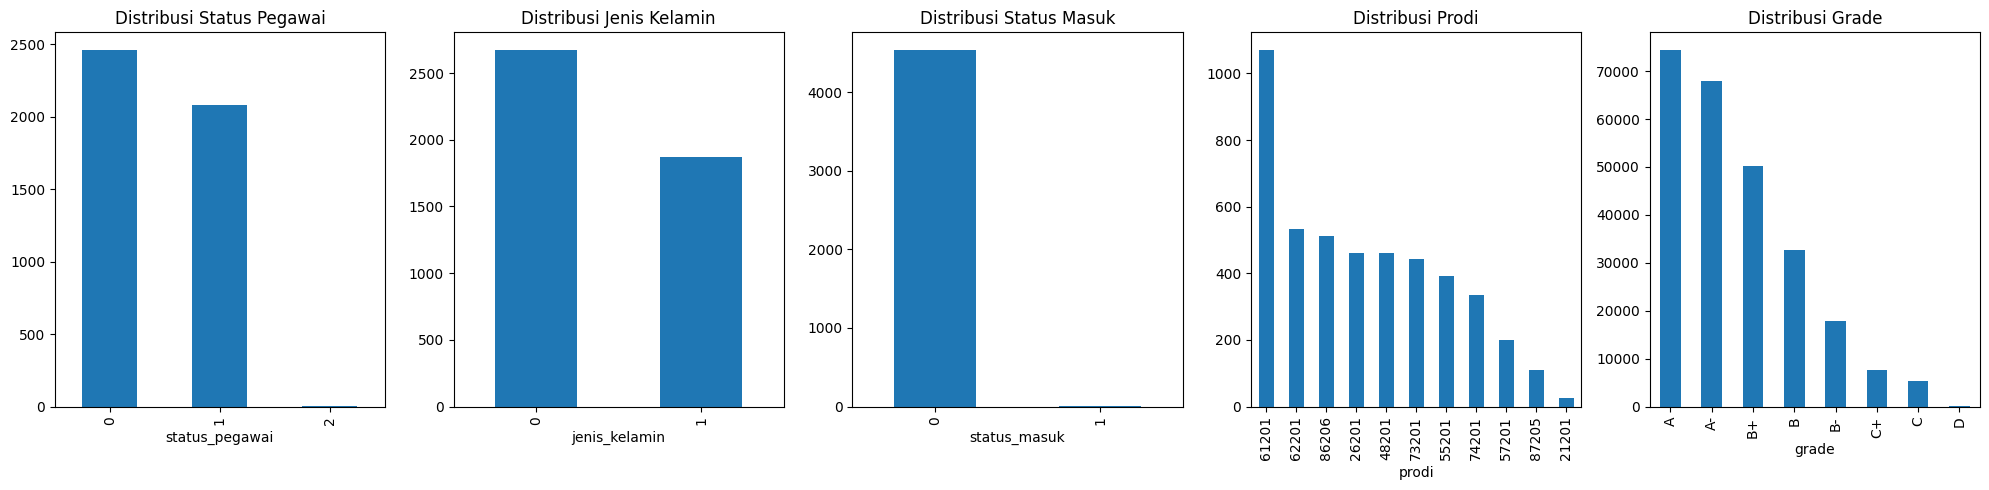

In [ ]:
# Membuat subplots dalam satu baris dengan 6 kolom
fig, axes = plt.subplots(1, 5, figsize=(20, 5))  # 1 baris, 5 kolom

# Visualisasi distribusi status_pegawai
df_lulusan['status_pegawai'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribusi Status Pegawai')

# Visualisasi data jenis kelamin
df_lulusan['jenis_kelamin'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribusi Jenis Kelamin')

# Visualisasi data status_masuk
df_lulusan['status_masuk'].value_counts().plot(kind='bar', ax=axes[2])
axes[2].set_title('Distribusi Status Masuk')

# Visualisasi distribusi prodi
df_lulusan['prodi'].value_counts().plot(kind='bar', ax=axes[3])
axes[3].set_title('Distribusi Prodi')

# Visualisasi distribusi grade
df_transkip['grade'].value_counts().plot(kind='bar', ax=axes[4])
axes[4].set_title('Distribusi Grade')

# Menampilkan semua plot
plt.tight_layout()  # Untuk menghindari tumpang tindih
plt.show()

### Membersihkan missing Value
1. mengganti kolom nama_mk yang missing value dengan nilai yang sesuai dengan kolom nama_mk_indo yang sesuai dengan kode_mknya
2. menghapus kolom nama_mk_indo dan nama_mk_ing karena hanya menyebutkan perbedaan bahasa, sehingga perlu dihapus untuk menghilangkan rendudansi data

In [ ]:
# menampilkan data yang missing value
df_transkip[df_transkip.isnull().any(axis=1)]

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
75819,75929,15416261201219,MN225764,Magang,Magang,NaN,4.00,88.60,7,3,A
79986,80622,19416257201065,SI1160050,Pemrograman Visual,Pemrograman Visual,NaN,3.75,81.00,0,3,A-
79992,80628,19416257201065,SI1190016,Jaringan Komputer *,Jaringan Komputer *,NaN,3.75,82.00,3,3,A-
80040,80676,19416257201067,SI1160050,Pemrograman Visual,Pemrograman Visual,NaN,4.00,86.00,0,3,A
146472,147436,18416248201005,FM1160055,Bahan Alam Non Tumbuhan,Bahan Alam Non Tumbuhan,NaN,3.50,78.15,6,3,B+
177344,178521,19416261201489,F01200009,Kewirausahaan,NaN,NaN,3.00,72.00,1,2,B
179745,180922,19416248201081,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",3.50,79.20,5,3,B+
184508,185791,19416248201086,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,89.95,5,3,A
184570,185853,19416248201044,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,86.35,5,3,A
184632,185915,19416248201113,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",3.75,84.85,5,3,A-


In [ ]:
# mlihat data dengan kode mk FM1190035
df_transkip[df_transkip['kode_mk'] == 'FM1190035']

,id,nim,kode_mk,nama_mk,nama_mk_indo,nama_mk_ing,nilai_grade,nilai_total,semester,sks_mk,grade
179745,180922,19416248201081,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",3.50,79.20,5,3,B+
184508,185791,19416248201086,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,89.95,5,3,A
184570,185853,19416248201044,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,86.35,5,3,A
184632,185915,19416248201113,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",3.75,84.85,5,3,A-
184694,185977,19416248201042,FM1190035,NaN,"Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,88.45,5,3,A
...,...,...,...,...,...,...,...,...,...,...,...
246356,249374,19416248201009,FM1190035,"FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULAN...","Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,88.45,5,3,A
248428,251446,19416248201122,FM1190035,"FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULAN...","Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",3.75,82.75,5,3,A-
248604,251622,19416248201035,FM1190035,"FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULAN...","Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,87.55,5,3,A
255209,258227,19416248201032,FM1190035,"FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULAN...","Farmakoterapi Infeksi, mata, Pernafasan, Tulan...","Infectious, Eye, Respiratory, Bone, and Joint ...",4.00,86.95,5,3,A


In [ ]:
# mengganti nilai yang kosong yang kode_mknya FM1190035 menjadi "FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULANG DAN SENDI"
df_transkip.loc[df_transkip['kode_mk'] == 'FM1190035', 'nama_mk'] = "FARMAKOTERAPI INFEKSI, MATA, PERNAFASAN, TULANG DAN SENDI"
# menghapus kolom nama_mk_indo dan nama_mk _ing
df_transkip.drop(['nama_mk_indo', 'nama_mk_ing'], axis=1, inplace=True)

## Hapus Kolom tahun_lahir yang bernilai 0
Berdasarkan hasil statistik deskriptif sebelumnya terlihat bahwa kolom tahun_lahir ada yang bernilai 0 tentunya ini tidak benar sehingga perlu ditangani. Pada proyek ini penanganan dilakukan dengan menghapusnya

In [ ]:
df_lulusan = df_lulusan[df_lulusan['tahun_lahir'] != 0]

### mengubah tipe data tanggal_lulus dan tgl_masuk menjadi datetime
Konversi ini bertujuan untuk memudahkan proses labeling nanti yang menghitung dari durasi perkuliahan yang dijalani

In [ ]:
# Konversi kolom 'tanggal_lulus' dan 'tgl_masuk' ke format datetime
df_lulusan['tanggal_lulus'] = pd.to_datetime(df_lulusan['tanggal_lulus'], format='%Y-%m-%d')
df_lulusan['tgl_masuk'] = pd.to_datetime(df_lulusan['tgl_masuk'], format='%Y-%m-%d')

## Pemeriksaan Nilai Tidak Valid pada Kolom `semester`
Dari hasil statistik deskriptif, ditemukan bahwa kolom semester memiliki nilai minimum 0. Hal ini tidak sesuai dengan logika akademik karena semester seharusnya dimulai dari 1.
Oleh karena itu, dilakukan pemeriksaan pada kolom `semester` dan melihat datanya.
Tujuannya adalah untuk mengidentifikasi keberadaan dan frekuensi nilai tidak valid (seperti 0) agar dapat diputuskan apakah akan dihapus atau diperbaiki pada tahap pra-pemrosesan data.

In [ ]:
# cari data yang semester 0
df_transkip[df_transkip['semester'] == 0]

,id,nim,kode_mk,nama_mk,nilai_grade,nilai_total,semester,sks_mk,grade
37104,37214,17416255201193,IF1160035,Otomata & Teori Bahasa Formal,3.00,79.0,0,3,B
37114,37224,17416255201193,IF1160045,Etika Profesi Teknologi Informasi,3.00,79.0,0,3,B
57312,57422,18416257201033,F02160009,Entrepreneurship,4.00,90.0,0,2,A
57340,57450,18416257201033,SI1160037,Pemrograman Web,3.00,74.0,0,3,B
57365,57475,18416257201065,F02160009,Entrepreneurship,4.00,90.0,0,2,A
...,...,...,...,...,...,...,...,...,...
248658,251676,17416262201210,AK1160037,PEMERIKSAAN I,3.75,85.0,0,3,A-
248661,251679,17416262201210,AK1160040,AKUNTANSI KEUANGAN LANJUTAN I,4.00,91.0,0,3,A
248663,251681,17416262201210,AK1160042,AKUNTANSI MANAJEMEN,3.75,85.0,0,3,A-
248674,251692,17416262201210,AK1160065,ANALISIS LAPORAN KEUANGAN,3.75,85.0,0,3,A-


## mengidentifikasi Nilai Semester yang valid
Berdasarkan hasil eksplorasi data, ditemukan bahwa kolom semester memiliki nilai tidak valid yaitu 0 210 data, cukup banyak. Secara akademik, semester seharusnya bernilai minimal 1. Oleh karena itu, dilakukan identifikasi dan perbaikan terhadap data tersebut agar tidak memengaruhi kualitas model klasifikasi.

Langkah-langkah yang dilakukan:

1. Mengidentifikasi semua kode_mk (kode mata kuliah) yang memiliki semester bernilai 0.
2. Melihat distribusi semester untuk setiap kode_mk tersebut. disini hanya menampilkan 3 data saja.

In [ ]:
# Identifikasi semua kode mata kuliah yang memiliki semester 0
kode_mk_semester_0 = df_transkip[df_transkip['semester'] == 0]['kode_mk'].unique()

# Tampilkan contoh kode mk yang awalnya semester 0 dan ternyata muncul di semester lain
# kode_mk_semester_0[:3] mengambil 3 elemen pertama dari array kode_mk_semester_0
for kode_mk in kode_mk_semester_0[:3]:
    print(f"{kode_mk}: {df_transkip[df_transkip['kode_mk'] == kode_mk]['semester'].unique()}")

IF1160035: [5 0]
IF1160045: [7 0]
F02160009: [5 7 0]


## Memperbaiki kolom semester menjadi nilai valid
proses di atas terlihat bahwa kode_mk tersebut muncul di semester valid lain, sehingga semester 0 dapat dikoreksi, kemungkinan perbedaan ini dikarenakan salah penulisan format, sehingga dilakukan penyesuaian format pada kolom `kode_mk` seperti menghapus spasi yang tidak perlu dan mengubah menjadi huruf kapital. Mengganti semester 0 dengan semester paling sering (mode) dari masing-masing kode_mk. Mode dipilih karena merepresentasikan semester yang paling umum untuk mata kuliah tersebut.

In [ ]:
# menyesuaikan format kode_mk yang tepat
df_transkip['kode_mk'] = df_transkip['kode_mk'].astype(str).str.strip().str.upper()

# Identifikasi semua kode mata kuliah yang memiliki semester 0
kode_mk_semester_0 = df_transkip[df_transkip['semester'] == 0]['kode_mk'].unique()

# Iterasi untuk menemukan nilai semester yang seharusnya berdasarkan data yang ada
for kode_mk in kode_mk_semester_0:
    # Temukan nilai semester yang paling umum atau pertama kali muncul
    semester_terbanyak = df_transkip[df_transkip['kode_mk'] == kode_mk]['semester'].mode()[0]

    # Ubah nilai semester yang sesuai
    df_transkip.loc[df_transkip['kode_mk'] == kode_mk, 'semester'] = semester_terbanyak

# Cek hasil perubahan
df_transkip[df_transkip['semester'] == 0]

,id,nim,kode_mk,nama_mk,nilai_grade,nilai_total,semester,sks_mk,grade
79986,80622,19416257201065,SI1160050,Pemrograman Visual,3.75,81.0,0,3,A-
80040,80676,19416257201067,SI1160050,Pemrograman Visual,4.00,86.0,0,3,A
110775,111677,19416257201004,SI1160050,Pemrograman Visual,3.00,72.0,0,3,B
166322,167286,20416274201164,UBP200004,Bahasa Indonesia,3.50,75.0,0,2,B+
232487,235449,20416262201064,UBP200004,BAHASA INDONESIA,3.50,75.0,0,2,B+
248674,251692,17416262201210,AK1160065,ANALISIS LAPORAN KEUANGAN,3.75,85.0,0,3,A-


## menghapus data yang semesternya 0
sisa dari data yang kolom semesternya masih bernilai 0 dianggap memang tidak mempunyai nilai valid sehingga dilakukan penghapusan agar optimal

In [ ]:
# hapus data yang semsester 0
df_transkip = df_transkip[df_transkip['semester'] != 0]

In [ ]:
df_transkip.shape[0]

256293

## Perhitungan IPS Mahasiswa per Semester dan Penggabungan Data
Tahapan ini digunakan untuk menghitung nilai IPS (Indeks Prestasi Semester) tiap mahasiswa berdasarkan data transkrip nilai.
1. Menghitung IPS
> IPS dihitung dari total perkalian antara nilai grade dan SKS mata kuliah, lalu dibagi dengan total SKS pada semester tersebut. Pengelompokan dilakukan berdasarkan nim dan semester.

2. Mengubah Format Tabel
> Hasil IPS diubah dari bentuk baris (setiap baris = satu semester) menjadi bentuk kolom (setiap kolom = satu semester), sehingga memudahkan dalam analisis dan modeling.

3. Penggabungan dengan Data Lulusan
> Data IPS yang telah diproses digabungkan dengan data mahasiswa lulusan berdasarkan kolom nim agar diperoleh satu dataset utuh yang berisi informasi nilai dan status kelulusan.

In [ ]:
# menghitung ips
ips_df = df_transkip.groupby(['nim', 'semester']).apply(
    lambda x: round((x['nilai_grade'] * x['sks_mk']).sum() / x['sks_mk'].sum(), 2)
).reset_index(name='IPS')

# Mengubah format dari baris ke kolom
ips_df = ips_df.pivot(index='nim', columns='semester', values='IPS').reset_index()
ips_df.columns = ['nim'] + [f'IPS SMT{col}' for col in ips_df.columns[1:]]

# Gabungkan dengan data ms_lulusan berdasarkan NIM
merged_df = pd.merge(ips_df, df_lulusan, on='nim', how='left')
merged_df.head()

<ipython-input-24-acad986a0fa2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ips_df = df_transkip.groupby(['nim', 'semester']).apply(


,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,IPS SMT9,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,NaN,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,NaN,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1


## Penanganan Kolom IPS SMT9
Beberapa mahasiswa memiliki nilai hingga semester 9, namun sebagian besar hanya sampai semester 8. Karena IPS SMT9 hanya muncul pada sedikit kasus maka dilakukan langkah berikut:
1. Nilai IPS SMT9 digantikan dengan nilai IPS SMT8 jika nilai IPS SMT9 tidak kosong.
2. Setelah disesuaikan, kolom IPS SMT9 dihapus agar data tetap konsisten hanya sampai IPS SMT8.
sehingga pada penelitian ini fokusnya hanya dari IPS semester 1-8 agar data konsisten

In [ ]:
merged_df['IPS SMT9'] = merged_df.apply(lambda row: row['IPS SMT9'] if pd.isna(row['IPS SMT9']) else row['IPS SMT8'], axis=1)
merged_df.drop(columns=['IPS SMT9'], inplace=True)
merged_df

,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai
0,15416226201001,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
1,15416226201002,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1
2,15416226201003,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1
3,15416226201004,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1
4,15416226201005,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,19416287205041,3.55,3.67,3.38,3.30,3.48,3.60,3.57,4.00,87205,Pujian,2023-08-29,2019-09-08,0,1,1974,1
4522,20416261201301,3.53,3.54,3.66,3.64,3.75,3.69,3.63,4.00,61201,Pujian,2022-10-10,2020-09-09,0,0,1997,0
4523,20416262201064,3.63,3.88,3.82,3.39,3.70,3.39,3.75,4.00,62201,Pujian,2023-08-31,2020-09-09,0,0,1994,0
4524,20416274201164,3.69,3.45,3.15,3.35,3.61,3.65,3.75,3.50,74201,Pujian,2022-08-22,2020-09-09,0,0,1997,0


## Perhitungan Lama Studi dan Status Kelulusan Tepat Waktu
Pada tahap ini dilakukan beberapa transformasi untuk menghitung durasi kuliah setiap mahasiswa dan menentukan apakah mereka lulus tepat waktu yang akan menjadi label klasifikasi nanti:
1. Menghitung Lama Studi
> Selisih antara tanggal masuk dan tanggal lulus dihitung dan diubah menjadi format "X Tahun Y Bulan" lalu disimpan di kolom Lama Kuliah.

2. Konversi ke Format Numerik
> Format "X Tahun Y Bulan" diubah ke bentuk numerik desimal (misalnya 3 tahun 6 bulan menjadi 3.5) agar dapat digunakan untuk klasifikasi.

3. Penentuan Kelulusan Tepat Waktu
> Jika mahasiswa lulus dalam rentang 3.5 hingga kurang dari 5 tahun, maka dianggap tepat waktu (1), jika tidak maka tidak tepat waktu (0).

4. Pembersihan Kolom Sementara
> Kolom Tahun Kuliah dihapus karena hanya digunakan untuk proses klasifikasi.

In [ ]:
# Menghitung durasi studi masing-masing mahasiswa dalam tahun dan bulan
def calculate_study_duration(row):
    start_date = pd.to_datetime(row['tgl_masuk'])
    end_date = pd.to_datetime(row['tanggal_lulus'])
    duration = end_date - start_date

    years = duration.days // 365
    months = (duration.days % 365) // 30
    return f"{years} Tahun {months} Bulan"

# Tambahkan kolom 'Lama Kuliah'
merged_df['Lama Kuliah'] = merged_df.apply(calculate_study_duration, axis=1)

# Fungsi untuk mengonversi durasi kuliah ke tahun dengan desimal bulan
def parse_study_duration(duration_str):
    years, months = duration_str.split(' Tahun ')
    years = int(years)
    months = int(months.split(' Bulan')[0])
    return years + months / 12

# Tambahkan kolom 'Tahun Kuliah'
merged_df['Tahun Kuliah'] = merged_df['Lama Kuliah'].apply(parse_study_duration)

# Menambahkan kolom 'Lulus tepat waktu/tidak'
def durasi_kuliah(years):
    return 1 if years >= 3.5 and years < 5 else 0

merged_df['Lulus tepat waktu/tidak'] = merged_df['Tahun Kuliah'].apply(durasi_kuliah)

# Drop kolom 'Tahun Kuliah' karena hanya digunakan untuk perhitungan sementara
merged_df = merged_df.drop(columns=['Tahun Kuliah'])
merged_df.head()

,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
0,15416226201001,3.20,3.40,2.93,2.99,3.33,3.41,3.42,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 Tahun 12 Bulan,1
1,15416226201002,3.28,3.37,3.14,3.44,3.56,3.49,3.62,3.75,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,1,3 Tahun 12 Bulan,1
2,15416226201003,3.23,3.28,2.94,3.25,3.32,3.08,3.60,3.75,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,1,3 Tahun 12 Bulan,1
3,15416226201004,3.31,3.21,3.24,3.50,3.22,2.69,3.57,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,1,3 Tahun 12 Bulan,1
4,15416226201005,3.13,3.40,3.02,3.36,3.34,3.23,3.64,3.50,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,1,3 Tahun 12 Bulan,1


## Identifikasi dan Visualisasi Nilai Ekstrem (Outliers)
> Pada tahap ini, kita melakukan identifikasi nilai ekstrem (outliers) pada kolom numerik dalam dataset. Nilai ekstrem adalah data yang berada jauh di luar rentang nilai yang diharapkan, yang dapat mempengaruhi hasil analisis dan model.

> Langkah pertama adalah menghitung rata-rata (mean) dan deviasi standar (standard deviation) dari setiap kolom numerik. Kemudian, rentang normal ditentukan dengan mengurangi tiga kali deviasi standar dari rata-rata untuk batas bawah, dan menambahkan tiga kali deviasi standar untuk batas atas. Nilai yang berada di luar rentang ini dianggap sebagai outliers.

> Jika ditemukan outliers, mereka akan dipisahkan dan divisualisasikan menggunakan boxplot dan scatter plot untuk menandai titik-titik data yang dianggap ekstrem dengan warna merah. Visualisasi ini bertujuan untuk memberikan gambaran yang lebih jelas mengenai sebaran data dan keberadaan outliers yang mungkin perlu diatasi sebelum melanjutkan analisis atau modeling.

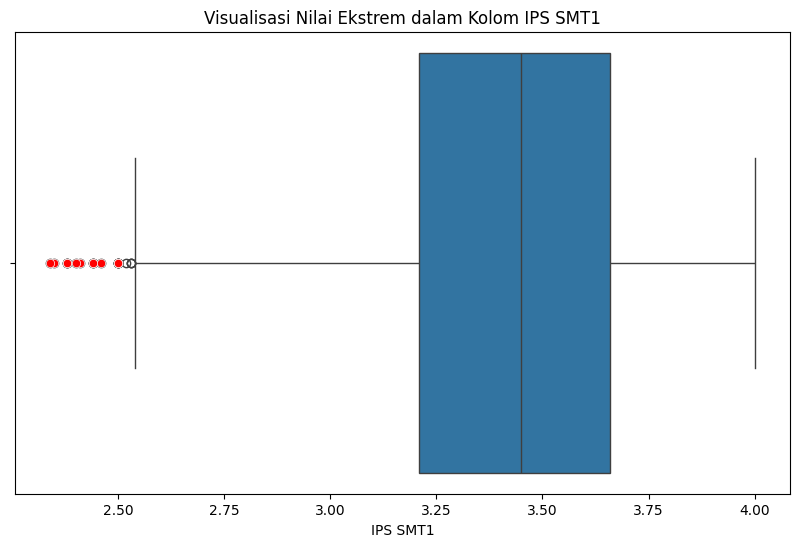

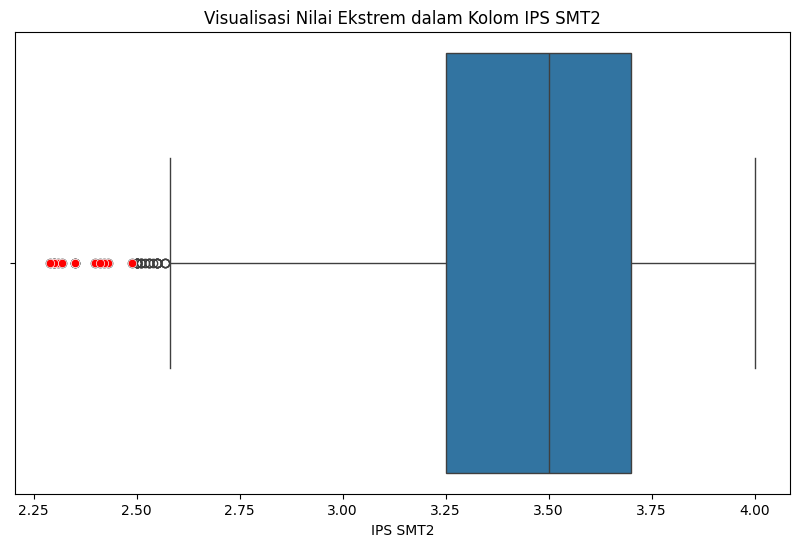

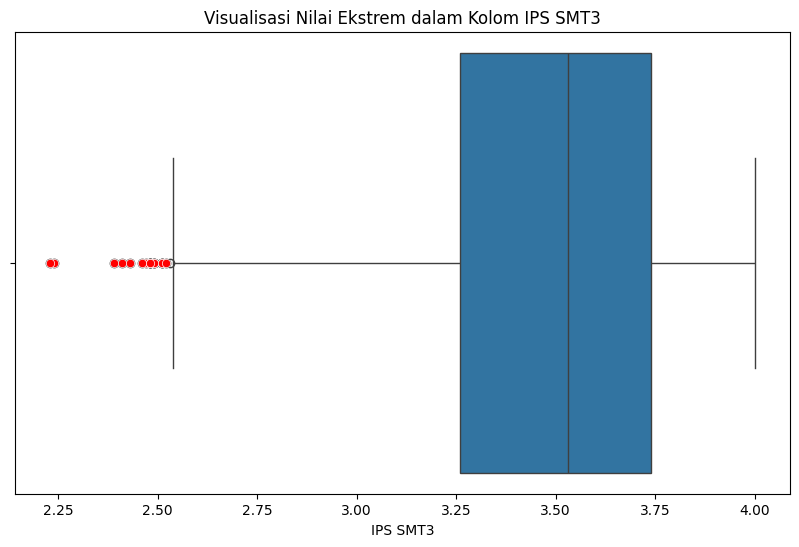

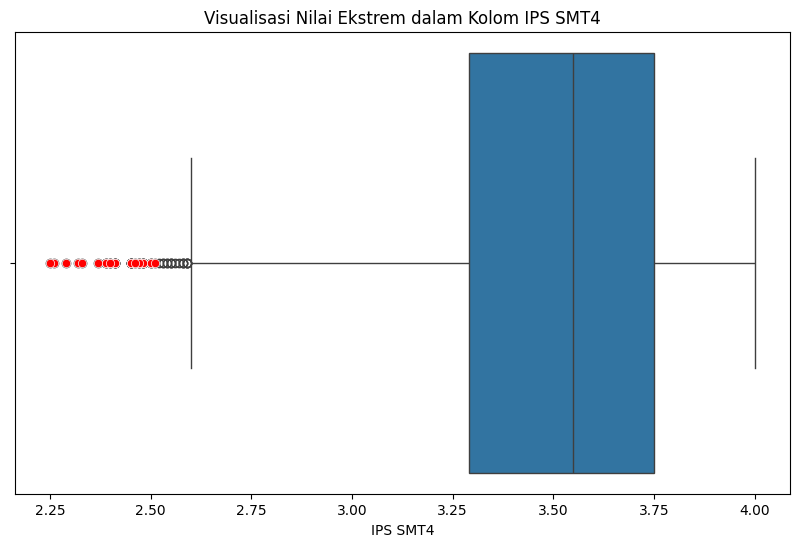

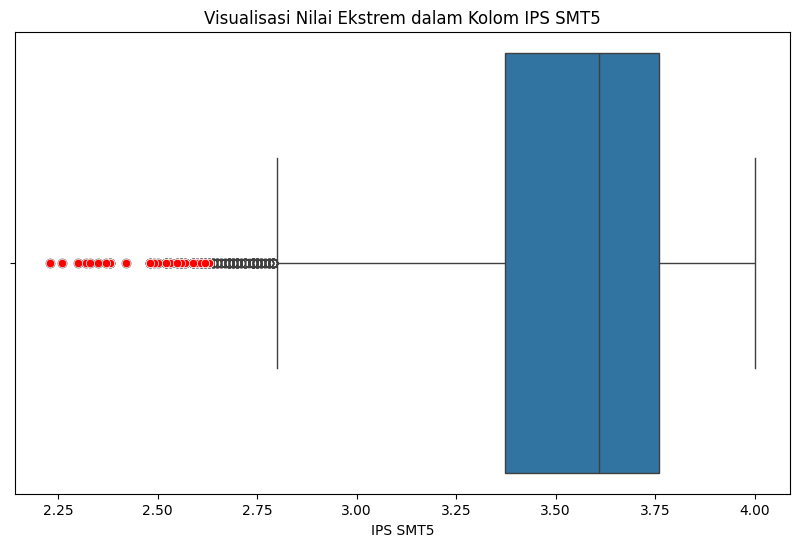

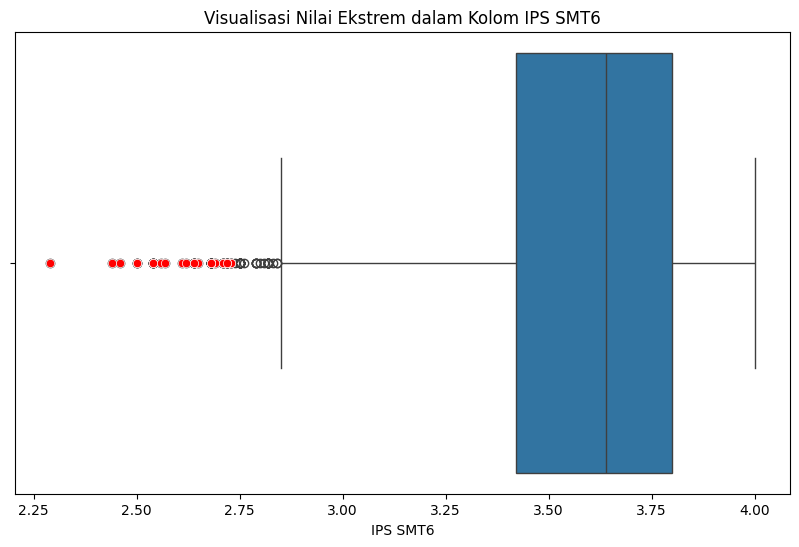

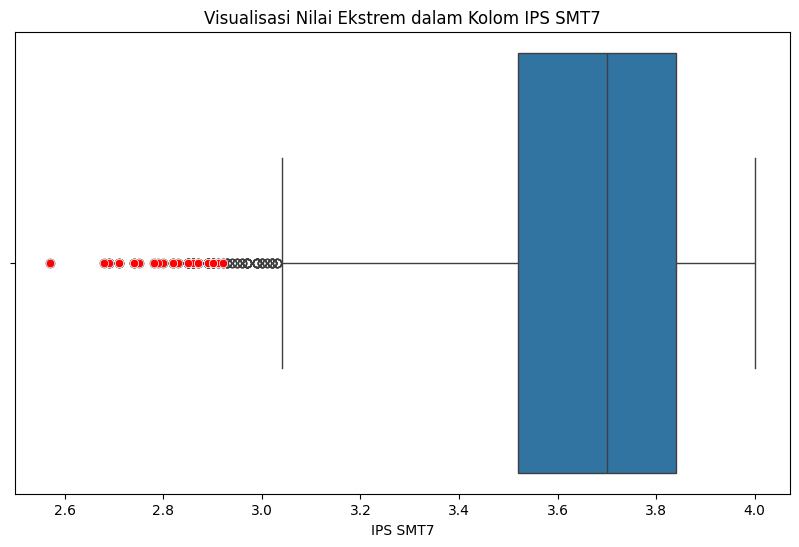

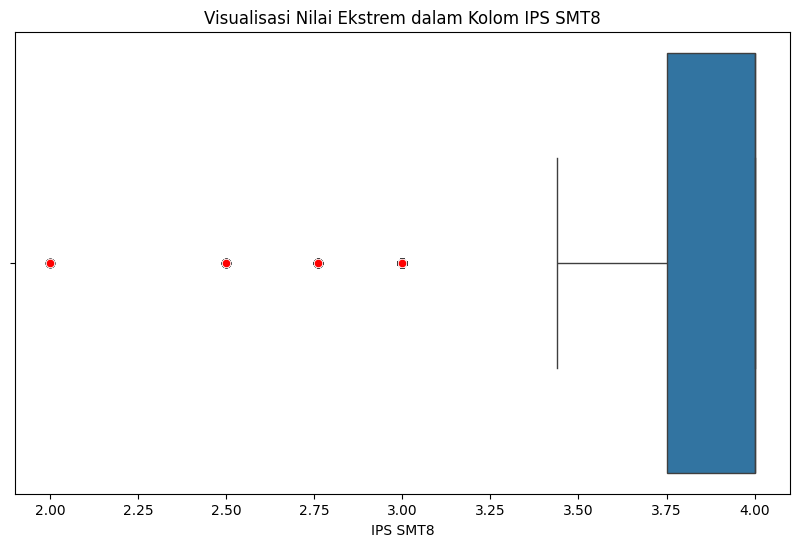

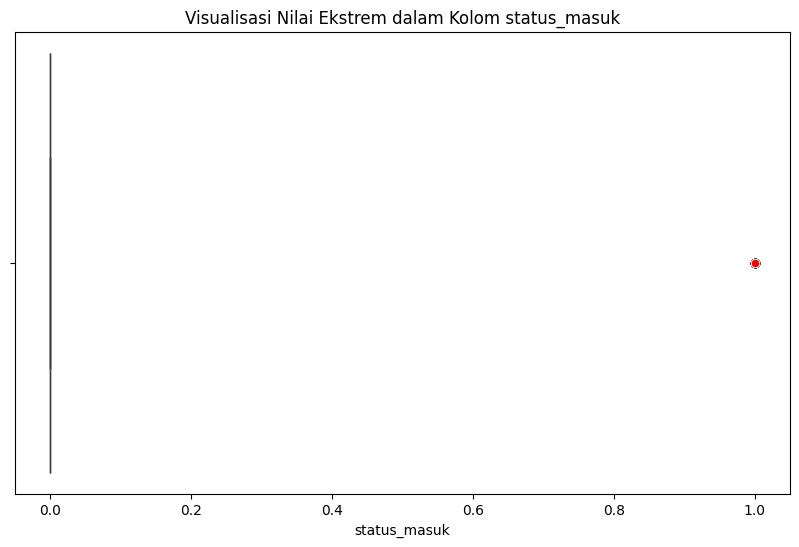

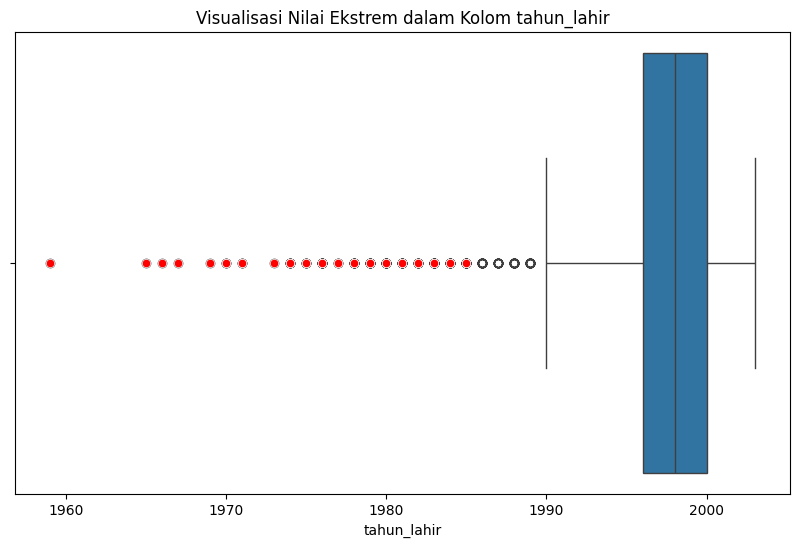

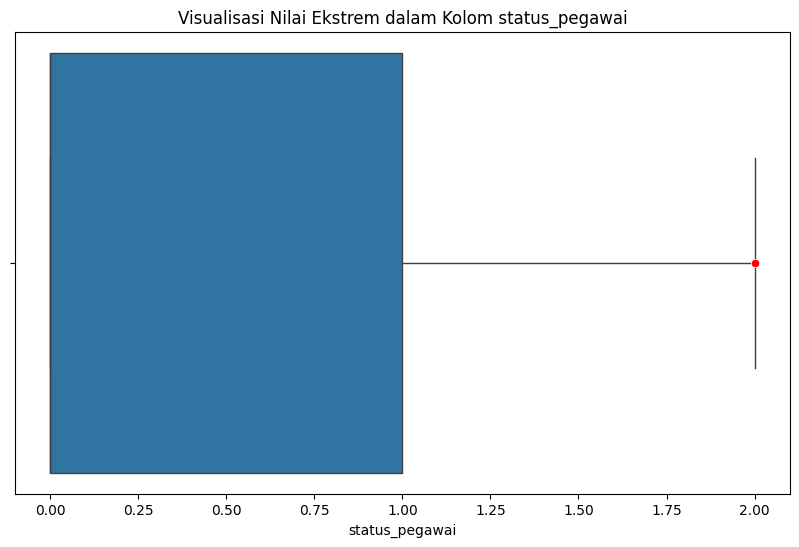

In [ ]:
# Mencari nilai-nilai ekstrem
numeric_columns = merged_df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    mean = merged_df[col].mean()
    std_dev = merged_df[col].std()
    lower_limit = mean - 3 * std_dev
    upper_limit = mean + 3 * std_dev

    outliers = merged_df[(merged_df[col] < lower_limit) | (merged_df[col] > upper_limit)]
    if not outliers.empty:
        # print(f"\nNilai ekstrem dalam kolom '{col}':")
        # print(outliers)
        # Visualisasi nilai ekstrem
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=merged_df[col])
        sns.scatterplot(x=outliers[col], y=[0]*len(outliers), color='red', zorder=10)
        plt.title(f'Visualisasi Nilai Ekstrem dalam Kolom {col}')
        plt.xlabel(col)
        plt.show()

## Mengidentifikasi kolom status_masuk
Menggunakan Visualisasi untuk melihat disrubusi dari kolom status_masuk.
Pada status_masuk ada nilai 0 yang berarti mahasiswa reguler dan 1 berarti mahasiswa pindahan. Pada penelitian ini berfokus pada mahasiswa reguler sehingga data pada mahasiswa pindahan dihapus


<Axes: xlabel='status_masuk'>

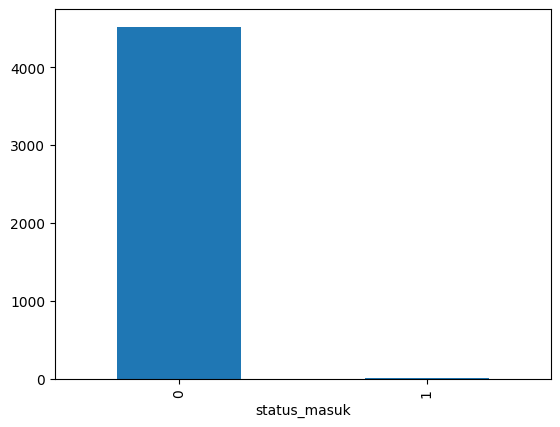

In [ ]:
# visualisasi jumlah kolom status_masuk
merged_df['status_masuk'].value_counts().plot(kind='bar')

In [ ]:
merged_df = merged_df.drop(merged_df[merged_df['status_masuk'] == 1].index)

##  Penanganan Nilai Tidak Valid pada Kolom Status Pegawai
> Pada tahap ini, ditemukan adanya data pada kolom status_pegawai yang bernilai 2, padahal seharusnya kolom tersebut hanya mengandung dua nilai, yaitu 0 (tidak bekerja) dan 1 (bekerja). Setelah melakukan pencarian, ditemukan bahwa nilai 2 hanya terdapat pada dua data, dengan tahun lahir 1994 dan 1997. Berdasarkan asumsi bahwa mahasiswa dengan tahun lahir tersebut kemungkinan besar sudah memasuki dunia kerja, maka nilai 2 pada kolom status_pegawai tersebut diganti menjadi 1 (bekerja).

In [ ]:
# cari data yang status_pegawai bernilai 2
merged_df[merged_df['status_pegawai'] == 2]

,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
1492,16416274201059,3.06,2.98,3.20,3.12,3.48,3.56,3.33,4.00,74201,Sangat Memuaskan,2021-12-06,2016-09-11,0,1,1997,2,5 Tahun 2 Bulan,0
1533,16416286206020,3.91,3.70,3.65,3.72,3.55,3.68,3.67,3.94,86206,Sangat Memuaskan,2023-08-24,2016-09-11,0,1,1994,2,6 Tahun 11 Bulan,0


In [ ]:
# mengganti status_pegawai yang bernilai 2 menjadi nilai 1
merged_df.loc[merged_df['status_pegawai'] == 2, 'status_pegawai'] = 1

## Binning Kolom IPS Berdasarkan Median
> Proses binning dilakukan terhadap delapan kolom IPS (Indeks Prestasi Semester) dari semester 1 hingga 8 untuk menyederhanakan nilai numerik menjadi bentuk kategorikal. Setiap kolom diubah berdasarkan nilai median: jika nilai IPS kurang dari atau sama dengan median, maka dikategorikan sebagai 0; jika lebih dari median, dikategorikan sebagai 1. Teknik ini bertujuan untuk mengurangi kompleksitas data numerik dan membantu model klasifikasi dalam memahami perbedaan performa akademik mahasiswa secara lebih terstruktur. Binning juga bermanfaat untuk mengatasi distribusi yang tidak seimbang serta meningkatkan interpretabilitas model dalam konteks prediksi kelulusan tepat waktu.

In [ ]:
# Daftar kolom IPS
ips_columns = ['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5', 'IPS SMT6', 'IPS SMT7', 'IPS SMT8']

# Lakukan binning (≤ median → 0, > median → 1)
for col in ips_columns:
    median_value = merged_df[col].median()
    merged_df[col] = merged_df[col].apply(lambda x: 0 if x <= median_value else 1)

## Pembuatan dan Encoding Fitur Kategori Usia Berdasarkan Tahun Lahir
Untuk memperkaya informasi demografis dalam dataset, dilakukan proses rekayasa fitur (feature engineering) dengan membuat kolom kategori usia berdasarkan atribut tahun_lahir. Data tahun lahir diklasifikasikan ke dalam tiga kategori usia: ‘Tua’ untuk tahun lahir sebelum 1990, ‘Dewasa’ untuk tahun lahir antara 1990 hingga 1999, dan ‘Muda’ untuk tahun 2000 ke atas. Kategori ini kemudian dikonversi ke bentuk numerik menggunakan metode Label Encoding agar dapat digunakan dalam pemodelan machine learning. Setelah proses encoding, kolom kelompok_usia disisipkan ke dalam DataFrame tepat setelah kolom tahun_lahir untuk menjaga keterkaitan logis antara fitur tersebut. Pendekatan ini bertujuan untuk menilai apakah kategori usia memiliki pengaruh terhadap kemungkinan mahasiswa lulus tepat waktu.

In [ ]:
# Membuat kolom kategori usia berdasarkan tahun lahir
def kelompok_usia(tahun):
    if tahun < 1990:
        return 'Tua'
    elif tahun < 2000:
        return 'Dewasa'
    else:
        return 'Muda'

# Terapkan fungsi ke DataFrame
merged_df['kelompok_usia'] = merged_df['tahun_lahir'].apply(kelompok_usia)

# Melakukan Label Encoding terhadap kolom kelompok_usia
encoder = LabelEncoder()
merged_df['kelompok_usia'] = encoder.fit_transform(merged_df['kelompok_usia'])

# Menyusun ulang kolom agar 'kelompok_usia' berada setelah 'tahun_lahir'
kolom = list(merged_df.columns)
kolom.remove('kelompok_usia')
indeks_tahun_lahir = kolom.index('tahun_lahir')
kolom.insert(indeks_tahun_lahir + 1, 'kelompok_usia')
merged_df = merged_df[kolom]

In [ ]:
merged_df

,nim,IPS SMT1,IPS SMT2,IPS SMT3,IPS SMT4,IPS SMT5,IPS SMT6,IPS SMT7,IPS SMT8,prodi,predikat,tanggal_lulus,tgl_masuk,status_masuk,jenis_kelamin,tahun_lahir,kelompok_usia,status_pegawai,Lama Kuliah,Lulus tepat waktu/tidak
0,15416226201001,0,0,0,0,0,0,0,0,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,0,1,3 Tahun 12 Bulan,1
1,15416226201002,0,0,0,0,0,0,0,0,26201,Pujian,2019-08-31,2015-09-06,0,0,1996,0,1,3 Tahun 12 Bulan,1
2,15416226201003,0,0,0,0,0,0,0,0,26201,Pujian,2019-08-31,2015-09-06,0,1,1984,2,1,3 Tahun 12 Bulan,1
3,15416226201004,0,0,0,0,0,0,0,0,26201,Pujian,2019-08-31,2015-09-06,0,1,1996,0,1,3 Tahun 12 Bulan,1
4,15416226201005,0,0,0,0,0,0,0,0,26201,Pujian,2019-08-31,2015-09-06,0,1,1994,0,1,3 Tahun 12 Bulan,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521,19416287205041,1,1,0,0,0,0,0,0,87205,Pujian,2023-08-29,2019-09-08,0,1,1974,2,1,3 Tahun 11 Bulan,1
4522,20416261201301,1,1,1,1,1,1,0,0,61201,Pujian,2022-10-10,2020-09-09,0,0,1997,0,0,2 Tahun 1 Bulan,0
4523,20416262201064,1,1,1,0,1,0,1,0,62201,Pujian,2023-08-31,2020-09-09,0,0,1994,0,0,2 Tahun 11 Bulan,0
4524,20416274201164,1,0,0,0,0,1,1,0,74201,Pujian,2022-08-22,2020-09-09,0,0,1997,0,0,1 Tahun 11 Bulan,0


## Heatmap Korelasi Antar Fitur Numerik
> Visualisasi heatmap ini dibuat untuk melihat hubungan korelasi antar fitur numerik dalam dataset. Langkah pertama adalah menyeleksi kolom-kolom dengan tipe data numerik menggunakan select_dtypes. Setelah itu, digunakan fungsi corr() untuk menghitung matriks korelasi antar kolom numerik tersebut. Hasil korelasi divisualisasikan menggunakan seaborn.heatmap dengan parameter annot=True agar nilai korelasi ditampilkan langsung pada setiap sel. Warna pada heatmap mencerminkan tingkat kekuatan korelasi, dengan skema warna coolwarm yang memudahkan identifikasi hubungan positif maupun negatif. Visualisasi ini berguna untuk memahami hubungan antar variabel dan membantu dalam proses seleksi fitur atau deteksi multikolinearitas sebelum pemodelan.

<Axes: >

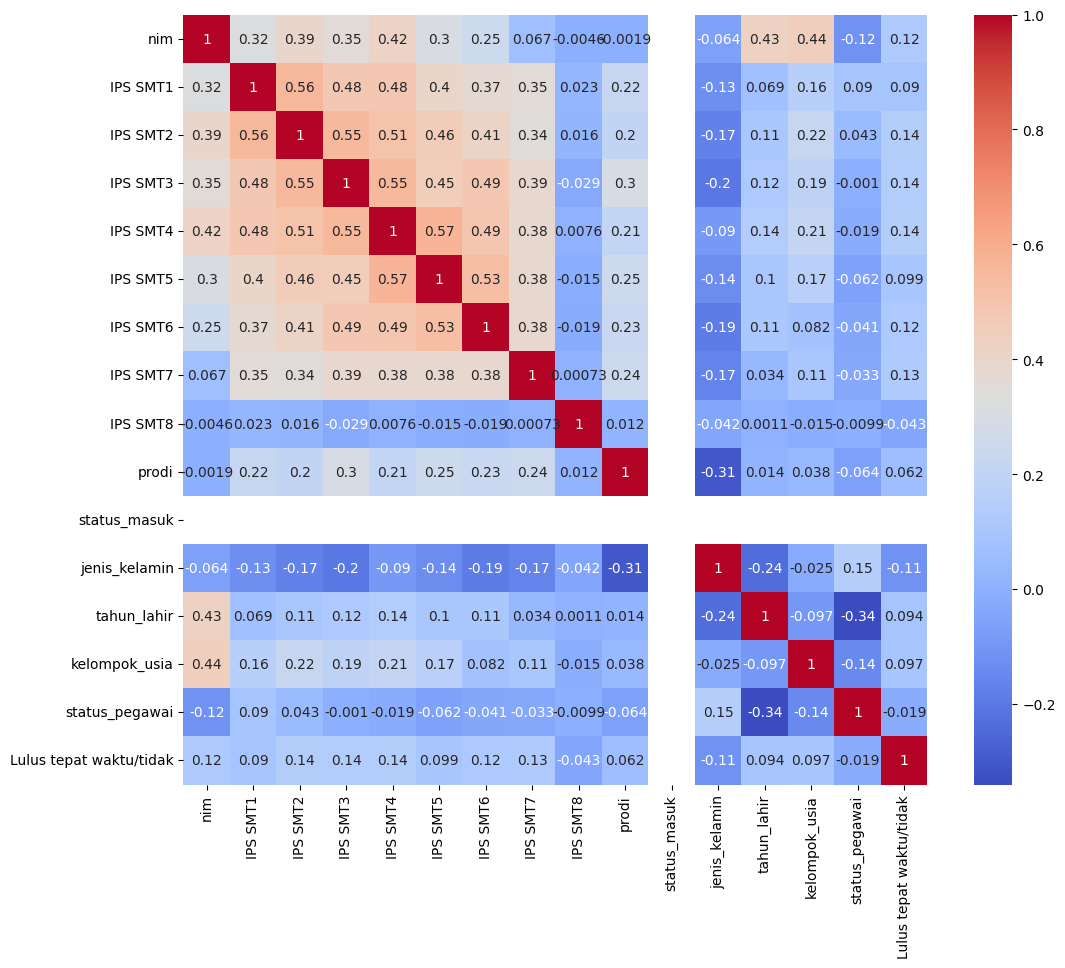

In [ ]:
# buatkan heatmap pada kolom numerik
# kolom numerik sjaa
numeric_columns = merged_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df[numeric_columns].corr(), annot=True, cmap='coolwarm')

## Pemilihan fitur dan pembagian dataset
Pada tahap ini dilakukan pemisahan antara fitur (X) dan label (y). Kolom target yaitu 'Lulus tepat waktu/tidak' dipisahkan dan disimpan sebagai variabel y, sedangkan fitur-fitur lainnya disimpan dalam variabel X, dengan menghapus kolom-kolom yang tidak relevan untuk pelatihan model seperti 'nim', 'status_masuk', 'tgl_masuk', 'tanggal_lulus', 'Lama Kuliah', 'predikat', serta IPS semester 8. Selanjutnya, dilakukan pembagian data menjadi 80% untuk data pelatihan dan 20% untuk data pengujian menggunakan fungsi train_test_split dari Scikit-Learn. Parameter random_state=42 digunakan agar hasil pembagian data bersifat reproducible, sementara stratify=y memastikan bahwa proporsi kelas target tetap seimbang pada data pelatihan dan pengujian.

In [ ]:
X = merged_df.drop(columns=['Lulus tepat waktu/tidak', 'nim', 'status_masuk', 'tgl_masuk', 'tanggal_lulus', 'Lama Kuliah', 'predikat', 'IPS SMT8', 'tahun_lahir'])
y = merged_df['Lulus tepat waktu/tidak']

# Pembagian data 80% untuk pelatihan dan 20% untuk pengujian secara acak
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

<Axes: xlabel='Lulus tepat waktu/tidak'>

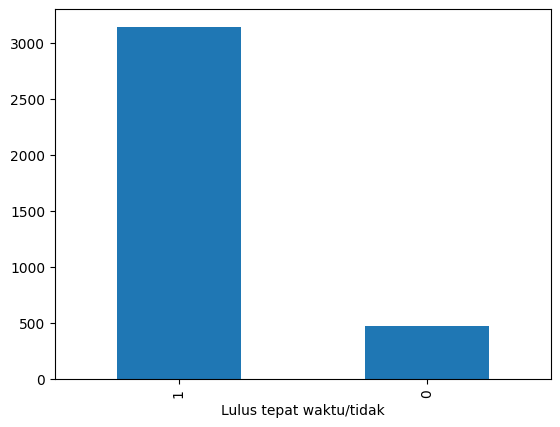

In [ ]:
# visualisasi distribusi y_train
y_train.value_counts().plot(kind='bar')

In [ ]:
# lihat jumlah data y_train untuk nilai 1 dan 0
print(y_train.value_counts())

Lulus tepat waktu/tidak
1    3143
0     472
Name: count, dtype: int64


## Penerapan SMOTE
Karena data target tidak seimbang—dengan jumlah mahasiswa yang lulus tepat waktu jauh lebih banyak dibandingkan yang tidak—maka dilakukan oversampling menggunakan metode SMOTE (Synthetic Minority Over-sampling Technique). SMOTE bekerja dengan cara membuat sampel sintetis dari kelas minoritas untuk menyeimbangkan distribusi kelas. Hal ini bertujuan agar model tidak bias terhadap kelas mayoritas dan dapat belajar mengenali pola dari kedua kelas secara seimbang. Setelah diterapkan, jumlah data untuk masing-masing kelas menjadi seimbang, sebagaimana ditunjukkan oleh hasil value_counts() pada label target.

In [ ]:
# terapkan smote
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
# cek jumlah data setelah smote
print(y_train.value_counts())

Lulus tepat waktu/tidak
0    3143
1    3143
Name: count, dtype: int64


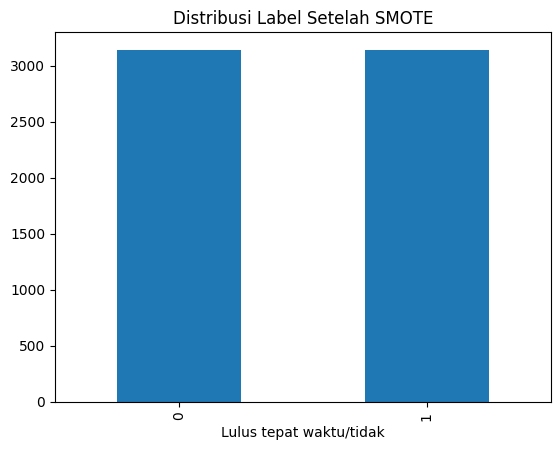

In [ ]:
# visulisasi ditribusi label y_train setelah smote
y_train.value_counts().plot(kind='bar')
plt.title('Distribusi Label Setelah SMOTE')
plt.show()

## Pemodelan Menggunakan Random Forest
Pada tahap ini, dilakukan pemodelan untuk memprediksi ketepatan waktu kelulusan mahasiswa dengan menggunakan algoritma Random Forest Classifier.
Model Random Forest Classifier diinisialisasi dengan parameter random_state=42 untuk memastikan hasil yang konsisten. Model ini kemudian dilatih menggunakan data pelatihan (X_train, y_train) yang sebelumnya telah di-resample dengan teknik SMOTE guna mengatasi ketidakseimbangan kelas. Setelah pelatihan, dilakukan prediksi terhadap data pelatihan dan data pengujian untuk mengevaluasi performa model. Akurasi dari kedua data tersebut dihitung dan ditampilkan untuk mengetahui seberapa baik model dalam mengenali pola. Selain itu, ditampilkan juga classification report yang memuat metrik precision, recall, dan f1-score pada data pengujian, serta confusion matrix yang divisualisasikan menggunakan heatmap untuk memberikan gambaran yang jelas terhadap distribusi hasil prediksi terhadap nilai aktual.

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Melatih model dengan data pelatihan yang sudah di-resample menggunakan SMOTE
rf_model.fit(X_train, y_train)

# Prediksi pada data pelatihan (training) dan pengujian (testing)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Menghitung akurasi untuk data pelatihan dan pengujian
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Menampilkan akurasi
print(f"Akurasi pada data pelatihan: {train_accuracy:.4f}")
print(f"Akurasi pada data pengujian: {test_accuracy:.4f}")

# Menampilkan classification report
print("\nClassification Report pada data pengujian:")
print(classification_report(y_test, y_test_pred))

# Menampilkan confusion matrix untuk data pengujian
cm = confusion_matrix(y_test, y_test_pred)

Akurasi pada data pelatihan: 0.8678
Akurasi pada data pengujian: 0.7611

Classification Report pada data pengujian:
              precision    recall  f1-score   support

           0       0.28      0.54      0.37       118
           1       0.92      0.79      0.85       786

    accuracy                           0.76       904
   macro avg       0.60      0.67      0.61       904
weighted avg       0.84      0.76      0.79       904



## Tuning Hyperparameter Menggunakan Bayesian Optimization dengan Optuna
Untuk mengoptimalkan kinerja model Random Forest dalam memprediksi ketepatan waktu kelulusan, dilakukan proses hyperparameter tuning menggunakan pendekatan Bayesian Optimization melalui library Optuna. Proses ini bertujuan untuk mencari kombinasi parameter terbaik yang menghasilkan akurasi prediksi tertinggi pada data pengujian. Beberapa parameter yang dituning meliputi jumlah estimators (n_estimators), kedalaman pohon (max_depth), jumlah minimum sampel untuk split (min_samples_split), jumlah minimum sampel di daun (min_samples_leaf), serta metode pemilihan fitur (max_features). Setelah proses optimasi selama 30 iterasi, model terbaik dilatih ulang dengan parameter yang diperoleh, kemudian dievaluasi menggunakan metrik akurasi, classification report, dan confusion matrix.

In [ ]:
# Fungsi objektif untuk optimasi
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    model = RandomForestClassifier(random_state=42, **params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Optimasi hyperparameter
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)  # Kamu bisa tambah trial jika perlu

# Ambil parameter terbaik dan latih model akhir
best_params = study.best_params
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

# Evaluasi
y_train_pred = best_rf_model.predict(X_train)
y_test_pred = best_rf_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cetak hasil
print(f"Akurasi pada data pelatihan: {train_accuracy:.4f}")
print(f"Akurasi pada data pengujian: {test_accuracy:.4f}")
print("\nClassification Report pada data pengujian:")
print(classification_report(y_test, y_test_pred))

[I 2025-05-11 12:19:15,955] A new study created in memory with name: no-name-e9023c17-3347-4d8e-9227-9d5dc220d562
[I 2025-05-11 12:19:17,362] Trial 0 finished with value: 0.745575221238938 and parameters: {'n_estimators': 348, 'max_depth': 40, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.745575221238938.
[I 2025-05-11 12:19:18,203] Trial 1 finished with value: 0.7477876106194691 and parameters: {'n_estimators': 228, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7477876106194691.
[I 2025-05-11 12:19:18,770] Trial 2 finished with value: 0.7511061946902655 and parameters: {'n_estimators': 146, 'max_depth': 46, 'min_samples_split': 9, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 2 with value: 0.7511061946902655.
[I 2025-05-11 12:19:19,302] Trial 3 finished with value: 0.75 and parameters: {'n_estimators': 137, 'max_depth': 47, 'min_samples_split

Akurasi pada data pelatihan: 0.8614
Akurasi pada data pengujian: 0.7732

Classification Report pada data pengujian:
              precision    recall  f1-score   support

           0       0.30      0.54      0.38       118
           1       0.92      0.81      0.86       786

    accuracy                           0.77       904
   macro avg       0.61      0.68      0.62       904
weighted avg       0.84      0.77      0.80       904



## Pengujian Data Baru
Setelah proses pelatihan dan optimasi model Random Forest selesai, langkah selanjutnya adalah melakukan pengujian terhadap data baru untuk mengevaluasi performa model dalam situasi nyata. Data baru yang digunakan merepresentasikan karakteristik mahasiswa dengan beberapa atribut seperti nilai IPS tiap semester, program studi, jenis kelamin, status pegawai, dan kelompok usia berdasarkan tahun lahir.
Proses pengujian diawali dengan pra-pemrosesan data baru agar sesuai dengan format dan transformasi data yang digunakan pada saat pelatihan model. Langkah-langkah yang dilakukan meliputi:

1. Penambahan Kolom Kelompok Usia
> Berdasarkan tahun lahir, individu dikategorikan ke dalam kelompok usia. Untuk tahun lahir 2003, individu termasuk ke dalam kelompok "Muda", yang kemudian dikonversi ke bentuk numerik menggunakan LabelEncoder yang telah di-fit sebelumnya pada data training.

2. Transformasi Nilai IPS
> Semua nilai IPS pada masing-masing semester dikonversi menjadi biner berdasarkan median nilai IPS pada data pelatihan. Jika nilai lebih dari median, maka diberi label 1, sebaliknya 0.

3. Penyusunan Kolom
> Kolom-kolom pada data uji disesuaikan urutannya agar identik dengan kolom yang digunakan pada pelatihan model (X_train.columns).

4. Prediksi
> Data yang sudah diproses kemudian dimasukkan ke dalam model Random Forest hasil optimasi (best_rf_model) untuk memperoleh hasil prediksi apakah mahasiswa tersebut lulus tepat waktu atau tidak.

Hasil dari proses prediksi tersebut ditampilkan dalam bentuk label, yaitu:

- Tepat Waktu jika model memprediksi nilai 1.

- Tidak Tepat Waktu jika model memprediksi nilai 0.




In [ ]:
# Data baru mentah
data_baru = {
    'IPS SMT1': 3.70,
    'IPS SMT2': 3.70,
    'IPS SMT3': 3.57,
    'IPS SMT4': 3.89,
    'IPS SMT5': 3.71,
    'IPS SMT6': 3.79,
    'IPS SMT7': 3.82,
    'prodi': 61201,
    'jenis_kelamin': 0,
    'status_pegawai': 0,
    'tahun_lahir': 2003  # untuk kelompok usia
}

# Buat dataframe
df_uji = pd.DataFrame([data_baru])

# Tambah kelompok_usia (label encoded)
df_uji['kelompok_usia'] = 'Muda'
# Use 'encoder' instead of 'label_encoder'
df_uji['kelompok_usia'] = encoder.transform(df_uji['kelompok_usia'])

# Calculate medians from the training data for IPS columns
medians = X_train[['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5', 'IPS SMT6', 'IPS SMT7']].median().to_dict()

# Binning IPS berdasarkan median dari data training
ips_cols = ['IPS SMT1', 'IPS SMT2', 'IPS SMT3', 'IPS SMT4', 'IPS SMT5', 'IPS SMT6', 'IPS SMT7']
for col in ips_cols:
    df_uji[col] = 1 if df_uji[col][0] > medians[col] else 0

# Susun ulang kolom sesuai X_train
df_uji = df_uji[X_train.columns]

# Prediksi
hasil_prediksi = best_rf_model.predict(df_uji)
label = 'Tepat Waktu' if hasil_prediksi[0] == 1 else 'Tidak Tepat Waktu'
print(df_uji)
print(f"Hasil prediksi: {label}")

   IPS SMT1  IPS SMT2  IPS SMT3  IPS SMT4  IPS SMT5  IPS SMT6  IPS SMT7  \
0         1         1         1         1         1         1         1   

   prodi  jenis_kelamin  kelompok_usia  status_pegawai  
0  61201              0              1               0  
Hasil prediksi: Tepat Waktu


## Analisis Feature Importance pada Model Random Forest
Untuk mengetahui seberapa besar kontribusi masing-masing fitur dalam menentukan prediksi model, dilakukan analisis feature importance menggunakan model Random Forest. Nilai importance dihitung berdasarkan rata-rata pengurangan impuritas (Gini atau entropy) pada setiap pemisahan yang dilakukan oleh pohon keputusan di dalam ensemble. Hasil analisis ditampilkan dalam bentuk visualisasi bar chart, yang menunjukkan fitur mana saja yang paling berpengaruh dalam menentukan prediksi ketepatan waktu kelulusan mahasiswa. Analisis ini membantu dalam memahami variabel mana yang paling relevan dan dapat dijadikan fokus dalam pengambilan keputusan atau pengembangan model lebih lanjut.

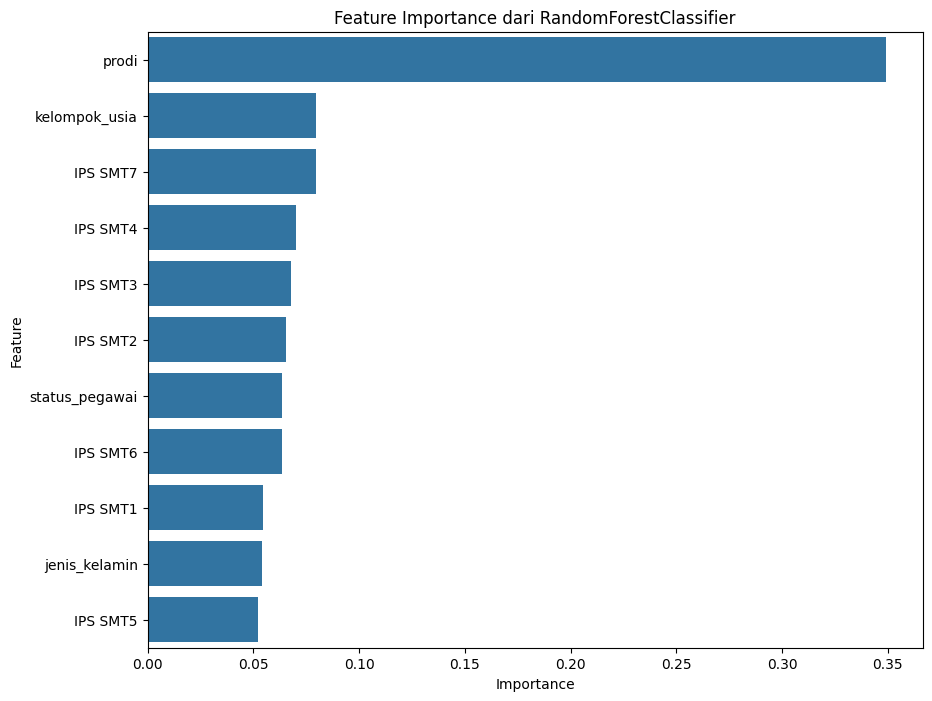

In [ ]:
# Feature Importance
feature_importances = best_rf_model.feature_importances_ # Changed 'final_model' to 'rf_model'
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Visualisasi Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance dari RandomForestClassifier')
plt.show()